## 2-Points Statistics

In [12]:
# loading the desilike enviroment
import os
import glob
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import FOLPSTracerPowerSpectrumMultipoles, FOLPSRCTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike import plotting
from desilike import setup_logging
setup_logging()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 14
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [13]:
# the tracers for DESI mocks
tracers = {
    'ELG_lowz': {
        'tracer': 'ELG_LOPnotqso',
        'zmin': 0.8,
        'zmax': 1.1,
        'zeff': 0.98,
        'ran_mock_num': 10
    },
    'ELG_highz': {
        'tracer': 'ELG_LOPnotqso',
        'zmin': 1.1,
        'zmax': 1.6,
        'zeff': 1.325,
        'ran_mock_num': 10
    },
}

In [30]:
MOCKNUM = 0
survey  ='Y1'
specver ='iron'
mockver ='v4_2'
tracer_type = 'ELG_lowz' # 'ELG_lowz', 'ELG_highz', 
region = "GCcomb"  # NGC, SGC or GCcomb

if tracer_type in tracers:
    settings = tracers[tracer_type]
    tracer = settings['tracer']
    zmin = settings['zmin']
    zmax = settings['zmax']
    zeff = settings['zeff']
    ran_mock_num = settings['ran_mock_num']
else:
    raise ValueError(f"Unknown ztype: {tracer_type}")

pk_dir = f'/pscratch/sd/s/shengyu/statistics/{tracer}/pk/'
cov_dir = f'/global/cfs/cdirs/desi/survey/catalogs/{survey}/mocks/SecondGenMocks/EZmock/desipipe/v1/ffa/2pt/'

# load the pk file, the pk calculated from the pkrun.py
pk_fn = pk_dir+f'pkpoles_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin.npy'
wmatrix_fn = pk_dir+f'wmatrix_smooth_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin.npy'

# load the covariance matrix from the Ezmocks
cov_fns = []
cov_fn = f'pkpoles_ELG_LOP_{region}_z{zmin}-{zmax}_default_FKP_lin_nran10_cellsize6_boxsize9000.npy'
for i in range(100, 200):
    mock_dir = f'mock{i}/pk/'
    cov_fns.extend(glob.glob(os.path.join(cov_dir,  mock_dir, cov_fn), recursive=True))

In [38]:
pk_fn = pk_dir+f'pkpoles_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin5.txt'
pkl_fiducial = np.loadtxt(pk_fn, dtype=complex)
pkl0_fiducial = np.real(pkl_fiducial[:,3])
pkl2_fiducial = np.real(pkl_fiducial[:,4])

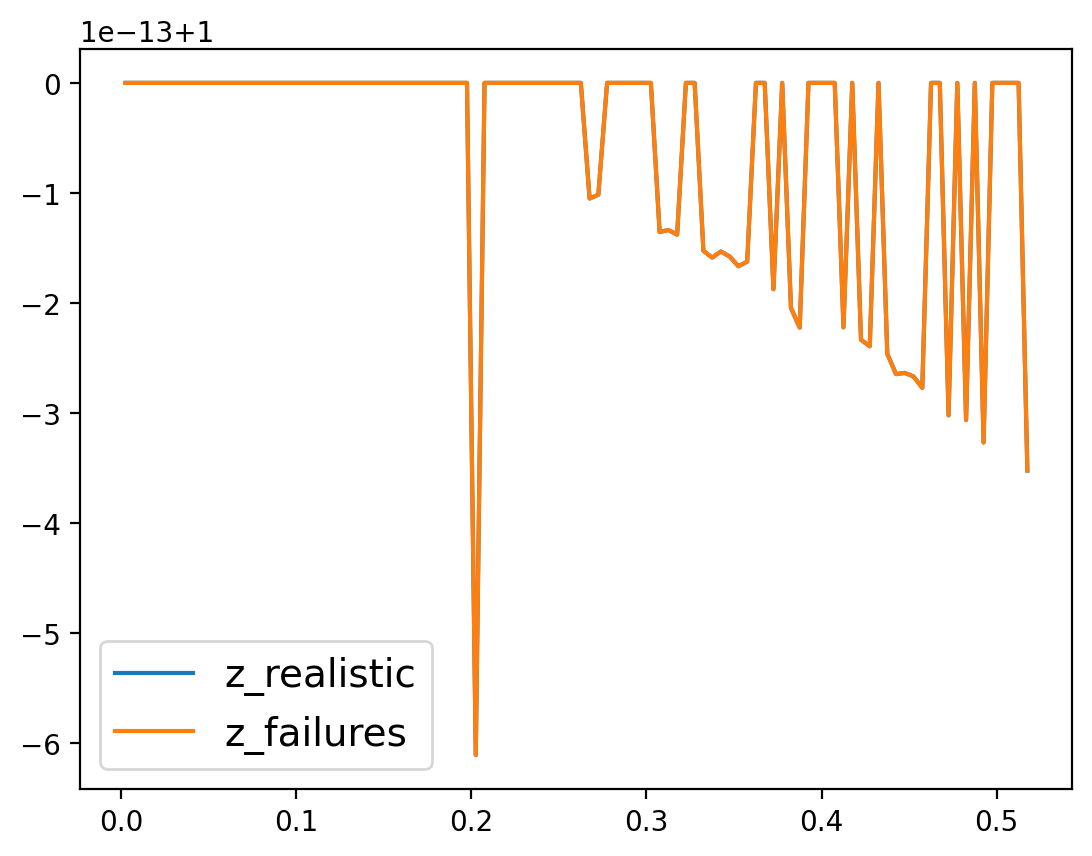

In [43]:
sys_types = ['_realistic', '_failures']
labels = ['z_realistic','z_failures']
for i, sys_type in enumerate(sys_types):
    pk_fn = pk_dir+f'pkpoles_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin5{sys_type}.txt'
    pkl = np.loadtxt(pk_fn, dtype=complex)
    k = np.real(pkl[:,1])
    pk0 = np.real(pkl[:,3])
    pk2 = np.real(pkl[:,4])
    plt.plot(k, (pkl0_fiducial/pk0), label= labels[i])
    # plt.plot(k, k*(pkl2_fiducial/pk2), label= labels[i])
    # plt.plot(k, k*pk2, label = sys_types[i])
plt.legend()
plt.show()

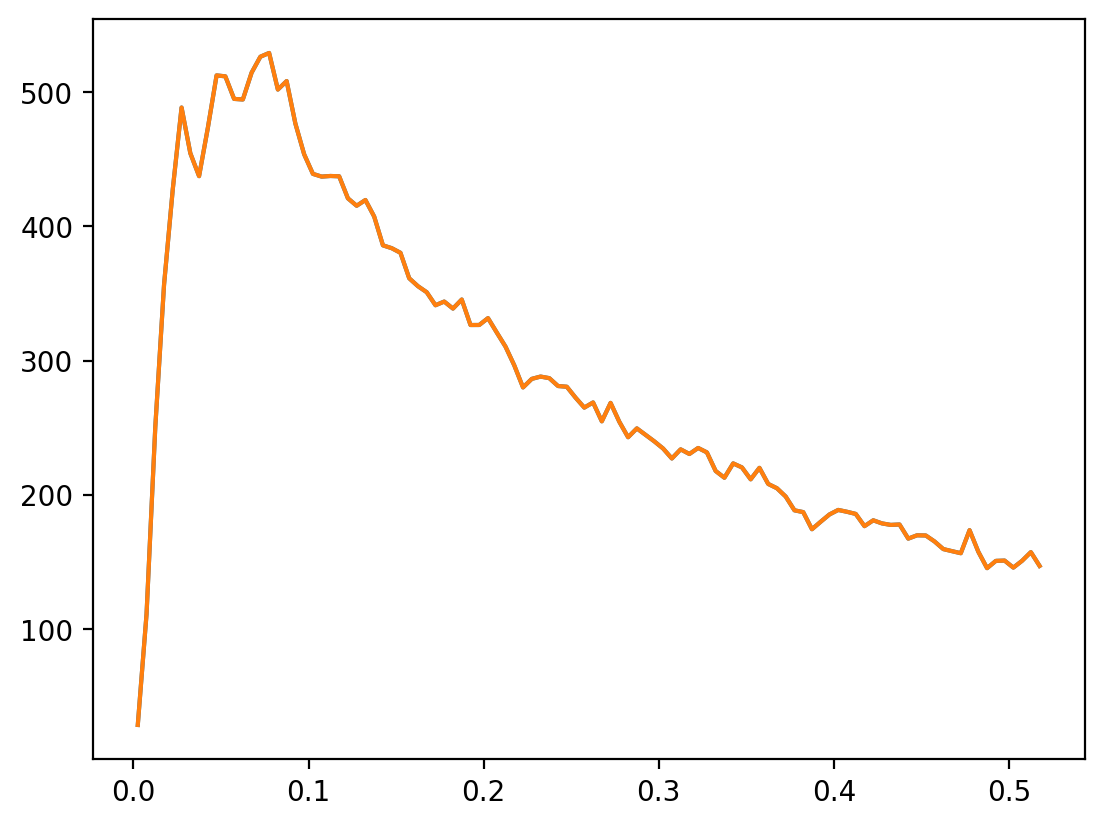

In [44]:
pk_fn = pk_dir+f'pkpoles_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin5{sys_type}.txt'

for i, sys_type in enumerate(sys_types):
    pk_fn = pk_dir+f'pkpoles_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin5{sys_type}.txt'
    pkl = np.loadtxt(pk_fn, dtype=complex)
    k = np.real(pkl[:,1])
    pk0 = np.real(pkl[:,3])
    pk2 = np.real(pkl[:,4])
    plt.plot(k, k*pk0, label= labels[i])
    # plt.plot(k, k*pk2, label = sys_types[i])